# Feature Selection - Automatic Methods with Categorical Target

In the previous notebook, we have covered how to use automated feature selection methods when dealing with a continuous target variable. 

In this notebook, we will focus on using automated feature selection methods when faced with categorical target variables and these scenarios - 

1. Categorical target with continuous features: Box Plots 
2. Categorical target with categorical features: Chi-Square test

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format

In [11]:
# Import data to a pandas dataframe
df_cars = pd.read_csv('indian cars dataset categorical nonulls.csv')
df_cars

# Our dataset contains information about cars that are for sale, and the target variable is the CATEGORICAL starting_price.

,starting_price_cat,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type
0,Up to 1M,51,89.0000,3500,65.7100,5500,27.0000,3,4.5000,5,Petrol,998,Automatic,Hatchback
1,Up to 1M,86,136.8000,4400,101.6500,6000,48.0000,4,4.5000,5,Petrol,1462,Automatic,SUV
2,1M to 5M,242,300.0000,2800,130.0000,3750,57.0000,4,4.5000,4,Diesel,2184,Automatic,SUV
3,1M to 5M,313,450.0000,2800,182.3800,3500,60.0000,4,4.5000,7,Diesel,2198,Automatic,SUV
4,1M to 5M,107,400.0000,2750,172.4500,3500,57.0000,4,4.5000,7,Diesel,2198,Automatic,SUV
5,1M to 5M,99,500.0000,2800,201.1500,3400,80.0000,4,4.5000,7,Diesel,2755,Automatic,SUV
6,1M to 5M,731,250.0000,2750,113.4500,4000,50.0000,4,4.5000,5,Diesel,1493,Automatic,SUV
7,Up to 1M,381,113.0000,3400,84.4800,6000,37.0000,3,4.5000,5,Petrol,1199,Automatic,SUV
8,Up to 1M,107,210.0000,2200,74.9600,3600,60.0000,3,4.5000,7,Diesel,1498,Manual,SUV
9,Up to 1M,205,113.0000,4400,88.5000,6000,37.0000,4,4.0000,5,Petrol,1197,Automatic,Hatchback


Currently, our target variable starting price is a continuous variable. We can make the target variable a categorical variable by the below code.

In [4]:
# Create variable to separate target from rest of dataframe
target_variable = df_cars['starting_price_cat']
target_variable

0      Up to 1M
1      Up to 1M
2      1M to 5M
3      1M to 5M
4      1M to 5M
         ...   
198    Up to 1M
199    1M to 5M
200    1M to 5M
201    Over 10M
202    Up to 1M
Name: starting_price_cat, Length: 203, dtype: object

### Selecting or Removing Categorical Features Using Box Plots

When dealing with the continuous features in our dataset, we can use box plots to see any trends or patterns that arise.

In [9]:
# Define data frame of numeric columns
df_num = df_cars.select_dtypes(include=np.number)
df_num.head()

,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,engine_displacement
0,51,89.0000,3500,65.7100,5500,27.0000,3,4.5000,5,998
1,86,136.8000,4400,101.6500,6000,48.0000,4,4.5000,5,1462
2,242,300.0000,2800,130.0000,3750,57.0000,4,4.5000,4,2184
3,313,450.0000,2800,182.3800,3500,60.0000,4,4.5000,7,2198
4,107,400.0000,2750,172.4500,3500,57.0000,4,4.5000,7,2198


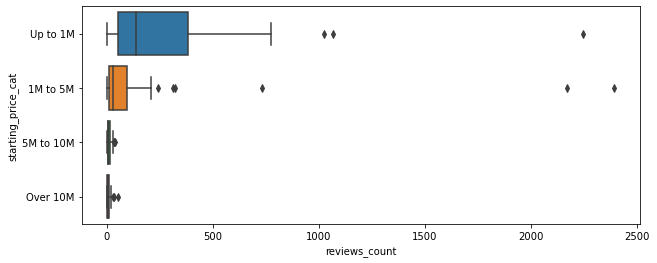

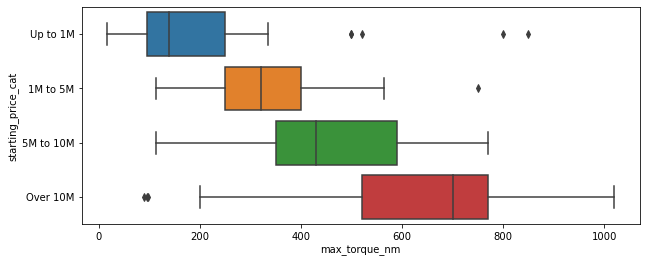

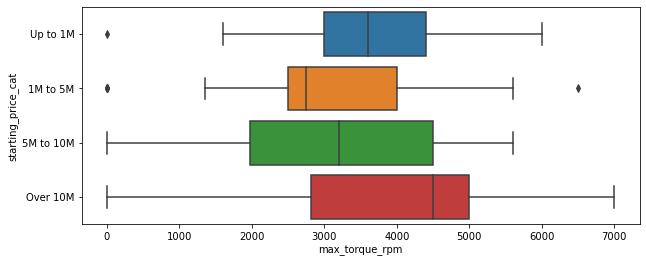

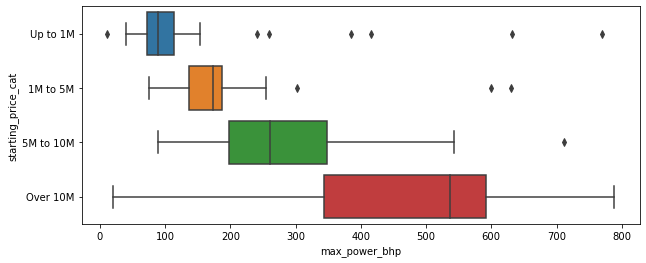

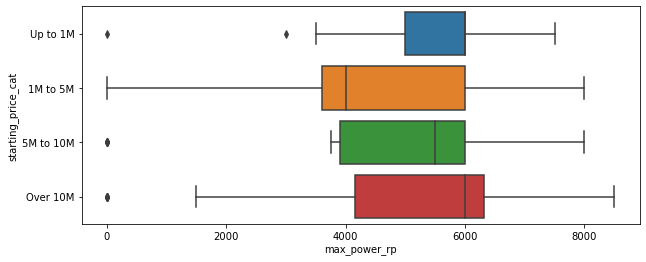

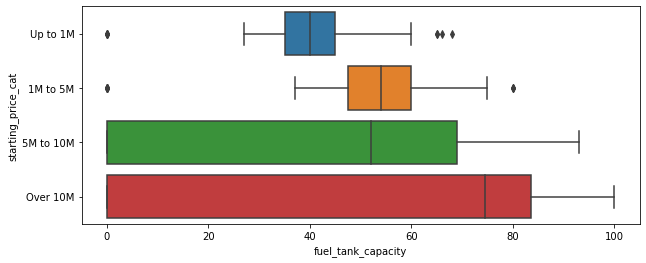

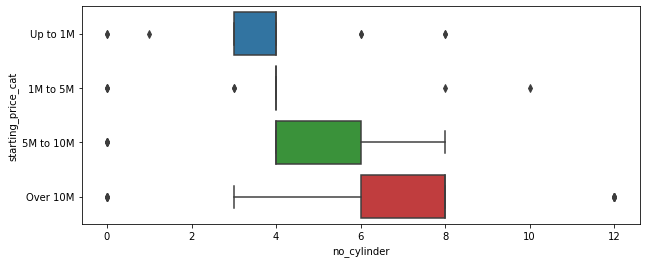

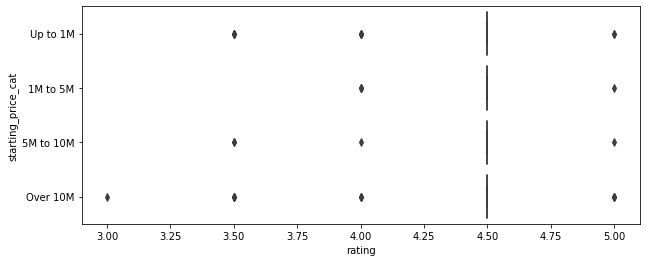

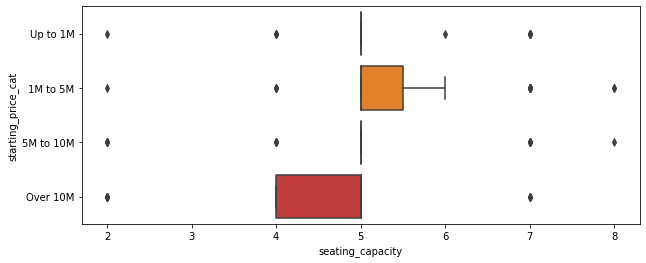

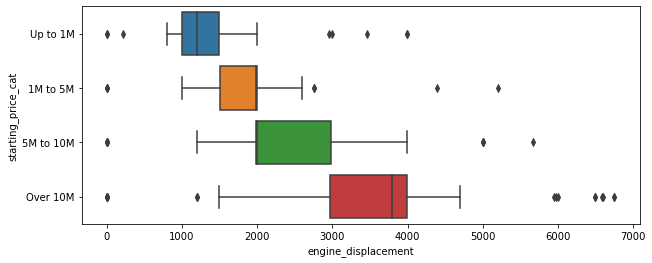

In [5]:
#plot a by target category box plot for each continuous feature
for feature in df_num.columns:
    fig, (ax) = plt.subplots(1,1, figsize = (10,4))
    sns.boxplot(data=df_cars,x=feature,y='starting_price_cat', ax = ax)
    plt.show()

We can see that some features - reviews count, max torque nm, max power bho, number of cylinders, and engine displacement have their median and overall distribution shifted positively or negatively based on the category of starting price. This would mean that the features that have this relationship are useful when predicting the target variable.

### Selecting or Removing Categorical Features Using Chi Squared

The Chi Squared test helps us select or remove **categorical** features, when dealing with a **categorical target**.

In [ ]:
# Define data frame of categorical columns
df_cat = df_cars.select_dtypes('object').drop(['starting_price_cat'], axis = 1)
df_cat.head()

Like ANOVA, Chi Squared can only perform its statistical test based on numbers, and so we must encode our categorical features.

In [ ]:
# One hot encode variables (would do this with OneHotEncoder in a realworld scenario as per FE chapter.)
df_cat_enc = pd.get_dummies(df_cat)
df_cat_enc

In [ ]:
# Import the required packages for SKLearn's SelectKBest and chi2
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Define the x and y datasets
x = df_cat_enc
y = target_variable

# define the feature selection algorithm
chi2_test = SelectKBest(score_func=chi2).fit(x, y)

# define the chi2 test output results
chi2_output = pd.DataFrame()
chi2_output['feature'] = df_cat_enc.columns
chi2_output['chi2_score'] = chi2_test.scores_
chi2_output['p_value'] = chi2_test.pvalues_
chi2_output = chi2_output.sort_values(by=['p_value'])

# Print the test results
print(chi2_output)

It is possible to use the SelectKBest transform method to return a reduced list of features, however, we will assume manual removal of features for now.



In [ ]:
# plot the scores
sns.barplot(data = chi2_output, x = 'chi2_score', y = 'feature')

Based on our chart above and the chi squared output, the first 6 values listed have a chi squared score high enough and p value low enough to be considered a statistically relevant feature.